<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/Kitsune_Network_Attack_model_training_std_scalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/kitsume_network_attack_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
0,63.593001,1409.273115,2.877740e+04,101.582531,1407.914397,3.257215e+04,282.890001,1404.229864,4.028884e+04,2705.734816,...,-1.786670e-11,-1.807032e-08,26923.369527,1401.300617,210.329481,1402.584550,4.423849e+04,-3.707493e-11,-3.557117e-08,0.0
1,33.567444,744.413016,4.039852e+05,61.758196,735.835298,4.055287e+05,205.166986,726.203756,4.053561e+05,2131.564557,...,0.000000e+00,0.000000e+00,8314.185744,1450.000000,0.000094,1450.000000,8.847564e-09,0.000000e+00,0.000000e+00,0.0
2,69.791455,739.279220,4.266278e+05,126.425891,738.767114,4.301293e+05,408.538742,736.226082,4.341408e+05,4238.143771,...,0.000000e+00,0.000000e+00,19190.900306,1450.000000,0.000193,1450.000000,3.725290e-08,0.000000e+00,0.000000e+00,0.0
3,155.469819,724.428175,4.257932e+05,240.495003,726.937293,4.259872e+05,623.368782,728.209538,4.225050e+05,5546.056321,...,0.000000e+00,0.000000e+00,16068.857113,205.449306,261.593114,205.449306,6.843096e+04,0.000000e+00,0.000000e+00,0.0
4,99.286193,733.178785,4.155803e+05,174.635337,730.839814,4.162693e+05,542.089746,725.367791,4.158204e+05,5459.958306,...,0.000000e+00,0.000000e+00,16095.227971,202.608187,254.298249,202.608187,6.466760e+04,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7359.674718,136.000000,5.093170e-11,12270.261123,136.000000,1.091394e-11,36474.563899,136.000000,1.418812e-10,137527.046516,...,0.000000e+00,0.000000e+00,5.857770,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99995,7355.013260,136.000000,3.637979e-11,12265.412882,136.000000,4.001777e-11,36474.413213,136.000000,1.091394e-10,137847.589699,...,0.000000e+00,0.000000e+00,2.976221,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99996,6528.089150,136.000000,1.818989e-11,8992.687314,136.000000,5.820766e-11,13159.085296,136.000000,1.091394e-10,15952.402740,...,0.000000e+00,0.000000e+00,1.998383,136.000000,0.000002,136.000000,3.637979e-12,0.000000e+00,0.000000e+00,1.0
99997,7369.582520,136.000000,6.912160e-11,12287.328934,136.000000,1.236913e-10,36848.957020,136.000000,2.546585e-11,190476.617565,...,0.000000e+00,0.000000e+00,5.851634,136.000000,0.000003,136.000000,1.091394e-11,0.000000e+00,0.000000e+00,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.626296
1.0    0.373704
Name: label, dtype: float64

In [5]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 1
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [6]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
0,63.593001,1409.273115,2.877740e+04,101.582531,1407.914397,3.257215e+04,282.890001,1404.229864,4.028884e+04,2705.734816,...,-1.786670e-11,-1.807032e-08,26923.369527,1401.300617,210.329481,1402.584550,4.423849e+04,-3.707493e-11,-3.557117e-08,0.0
1,33.567444,744.413016,4.039852e+05,61.758196,735.835298,4.055287e+05,205.166986,726.203756,4.053561e+05,2131.564557,...,0.000000e+00,0.000000e+00,8314.185744,1450.000000,0.000094,1450.000000,8.847564e-09,0.000000e+00,0.000000e+00,0.0
2,69.791455,739.279220,4.266278e+05,126.425891,738.767114,4.301293e+05,408.538742,736.226082,4.341408e+05,4238.143771,...,0.000000e+00,0.000000e+00,19190.900306,1450.000000,0.000193,1450.000000,3.725290e-08,0.000000e+00,0.000000e+00,0.0
3,155.469819,724.428175,4.257932e+05,240.495003,726.937293,4.259872e+05,623.368782,728.209538,4.225050e+05,5546.056321,...,0.000000e+00,0.000000e+00,16068.857113,205.449306,261.593114,205.449306,6.843096e+04,0.000000e+00,0.000000e+00,0.0
4,99.286193,733.178785,4.155803e+05,174.635337,730.839814,4.162693e+05,542.089746,725.367791,4.158204e+05,5459.958306,...,0.000000e+00,0.000000e+00,16095.227971,202.608187,254.298249,202.608187,6.466760e+04,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7359.674718,136.000000,5.093170e-11,12270.261123,136.000000,1.091394e-11,36474.563899,136.000000,1.418812e-10,137527.046516,...,0.000000e+00,0.000000e+00,5.857770,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99995,7355.013260,136.000000,3.637979e-11,12265.412882,136.000000,4.001777e-11,36474.413213,136.000000,1.091394e-10,137847.589699,...,0.000000e+00,0.000000e+00,2.976221,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99996,6528.089150,136.000000,1.818989e-11,8992.687314,136.000000,5.820766e-11,13159.085296,136.000000,1.091394e-10,15952.402740,...,0.000000e+00,0.000000e+00,1.998383,136.000000,0.000002,136.000000,3.637979e-12,0.000000e+00,0.000000e+00,1.0
99997,7369.582520,136.000000,6.912160e-11,12287.328934,136.000000,1.236913e-10,36848.957020,136.000000,2.546585e-11,190476.617565,...,0.000000e+00,0.000000e+00,5.851634,136.000000,0.000003,136.000000,1.091394e-11,0.000000e+00,0.000000e+00,1.0


In [7]:
number_of_cols = bin_data.shape[1]

In [8]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.626296
1.0    0.373704
Name: label, dtype: float64

In [9]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [10]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [11]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [12]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
65134,1.103024,-0.971367,-0.940826,0.802000,-0.972813,-0.942758,0.052880,-0.974733,-0.944921,-0.480164,...,-0.024202,-0.011721,-1.151020,-0.698420,-0.770012,-0.800732,-0.814145,0.263325,0.226126,1.0
9928,-0.786514,-1.150074,-0.940289,-0.782254,-1.134515,-0.931086,-0.764062,-0.653157,-0.841614,-0.695199,...,-0.024202,-0.011721,-1.150866,-0.826403,-0.770012,-0.884371,-0.814145,0.263325,0.226126,0.0
89685,1.326148,-0.971367,-0.940826,1.346872,-0.972813,-0.942758,1.427880,-0.974733,-0.944921,0.933362,...,-0.024202,-0.011721,-1.151020,-0.698420,-0.770012,-0.800732,-0.814145,0.263325,0.226126,1.0
60954,-0.768145,0.403189,1.101320,-0.765935,0.400494,1.082266,-0.749295,0.388762,1.059905,-0.666935,...,-0.024202,-0.011721,0.076897,-0.529530,1.703901,-0.636731,1.989886,0.263325,0.226126,0.0
69188,1.164703,-0.971367,-0.940826,0.894118,-0.972813,-0.942758,0.135799,-0.974733,-0.944921,-0.452507,...,-0.024202,-0.011721,-1.151020,-0.698420,-0.770012,-0.800732,-0.814145,0.263325,0.226126,1.0


In [13]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
26002,1.515383e+09,4.734730e+09,4.156620e+11,2.630274e+09,4.599412e+09,3.469466e+11,8.023120e+09,4.414965e+09,2.475562e+11,8.110521e+10,...,0.225744,-0.162717,8.183847e+11,3.931904e+09,9.904087e+01,9.174545e+10,3.059233e+12,0.225822,-0.707140,0.0
80420,4.821350e+11,8.912316e+09,2.328016e-01,8.040866e+11,8.912316e+09,2.449601e-01,2.413386e+12,8.912316e+09,2.325632e-01,1.326777e+13,...,0.226126,0.226126,3.122948e+08,8.912316e+09,1.252180e+02,8.912316e+09,2.263647e-01,0.226126,0.226126,1.0
19864,1.368246e+09,3.931904e+09,2.261561e-01,2.385654e+09,3.931904e+09,2.262753e-01,7.864380e+09,3.931904e+09,1.236771e+03,8.305572e+10,...,0.225825,-0.091460,8.162148e+11,3.931904e+09,3.954851e+02,9.189695e+10,2.898029e+12,0.223651,-1.725724,0.0
81525,4.845133e+11,8.912316e+09,2.266031e-01,8.067542e+11,8.912316e+09,2.316096e-01,2.412544e+12,8.912316e+09,2.466290e-01,1.124336e+13,...,0.226126,0.226126,3.201615e+08,8.912316e+09,2.261263e-01,8.912316e+09,2.261263e-01,0.226126,0.226126,1.0
57878,3.575445e+09,9.216887e+10,2.112726e+12,5.686160e+09,9.202640e+10,2.267095e+12,1.712545e+10,9.203459e+10,2.416963e+12,1.752625e+11,...,0.226469,0.529099,1.762309e+12,9.184975e+10,1.362001e+10,9.193387e+10,2.830761e+12,0.225536,-0.107884,0.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [14]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [15]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary_unsw_nb15.pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

In [16]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  72.128


In [17]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

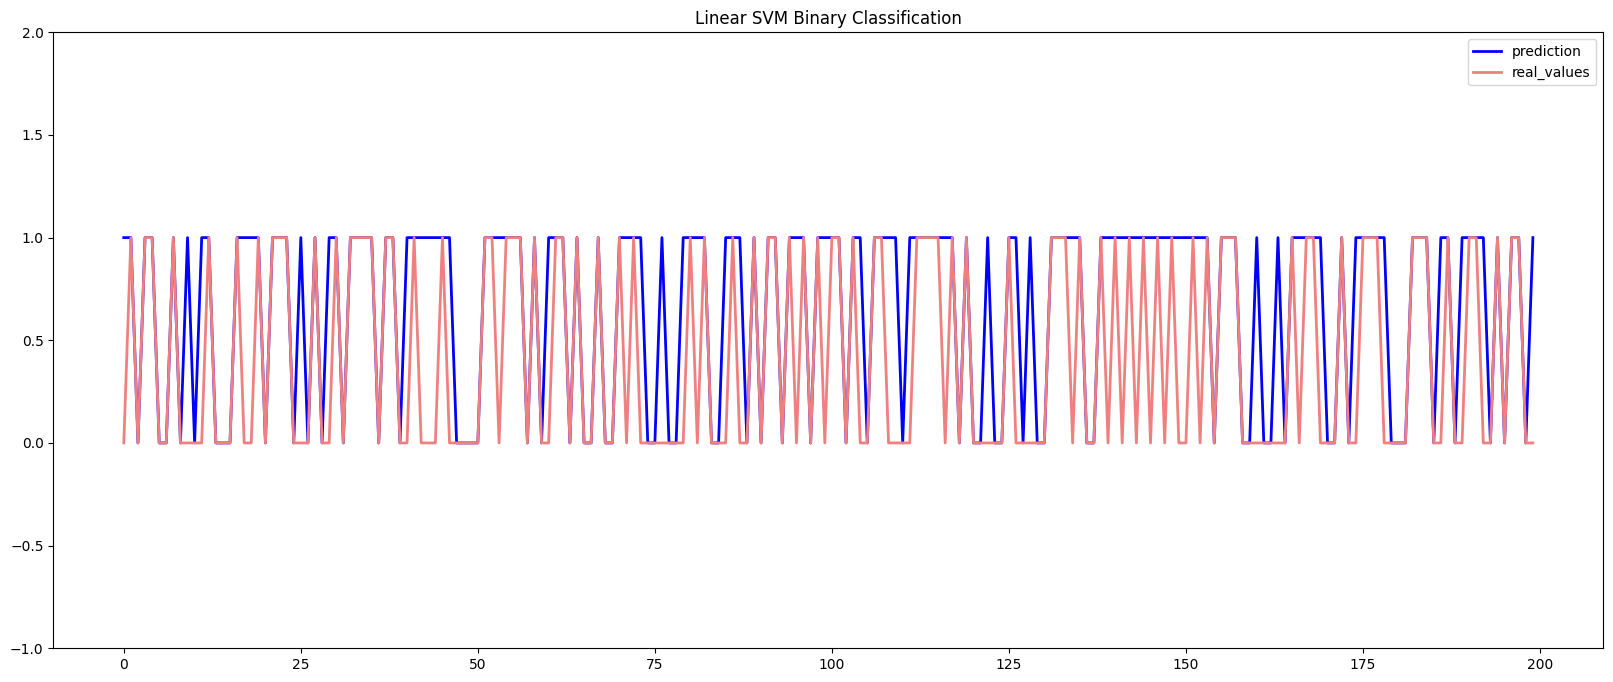

In [18]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [19]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.56      0.71     15701
     class 1       0.57      1.00      0.73      9299

    accuracy                           0.72     25000
   macro avg       0.79      0.78      0.72     25000
weighted avg       0.84      0.72      0.72     25000



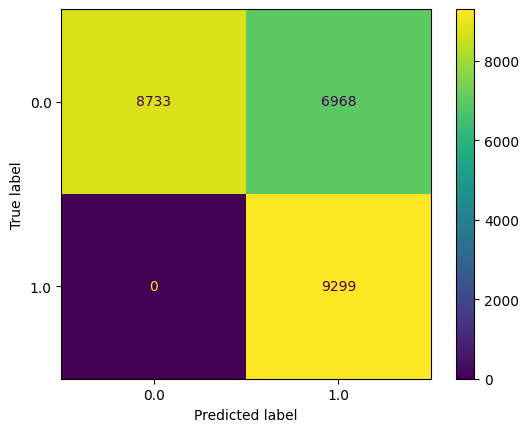

In [20]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [21]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5850      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 5s 38ms/step - loss: 0.2133 - accuracy: 0.9720 - val_loss: 0.0760 - val_accuracy: 0.9934
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0580 - accuracy: 0.9930 - val_loss: 0.0432 - val_accuracy: 0.9934
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0402 - accuracy: 0.9931 - val_loss: 0.0350 - val_accuracy: 0.9935
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0330 - accuracy: 0.9933 - val_loss: 0.0302 - val_accuracy: 0.9937
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0280 - accuracy: 0.9939 - val_loss: 0.0271 - val_accuracy: 0.9943
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 0.9945 - val_loss: 0.0253 - val_accuracy: 0.9949
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0235 - accuracy: 0.9951 - val_loss: 0.0241 - val_accuracy: 0.9950
Epoch 

In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

782/782 [==============================] - 2s 2ms/step - loss: 20078546872677957632.0000 - accuracy: 0.4590
Test results - Loss: 2.0078546872677958e+19 - Accuracy: 45.903998613357544


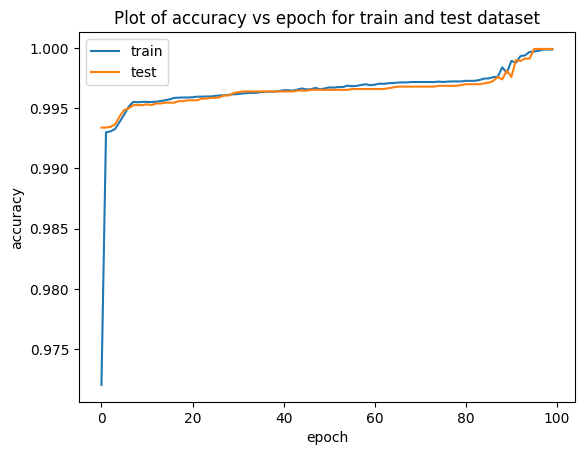

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

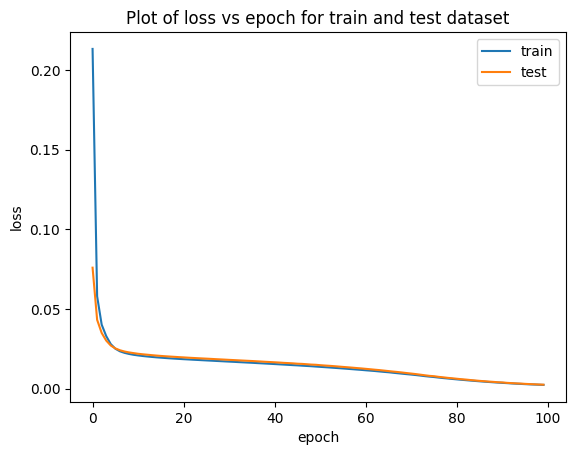

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

782/782 [==============================] - 1s 1ms/step


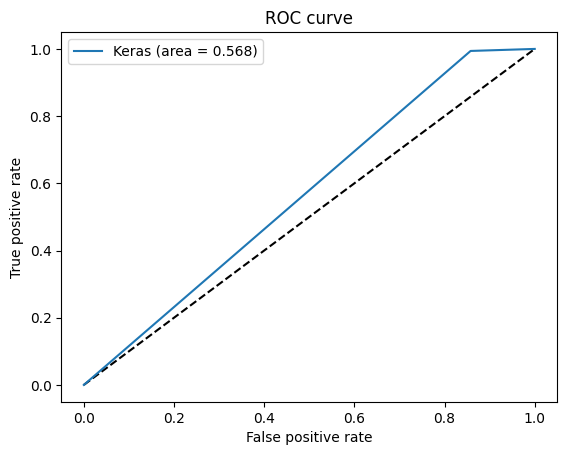

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [33]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [34]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

782/782 [==============================] - 2s 2ms/step


In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9939778470803312
F1 Score -  0.5775070290534208
Precision Score -  0.406983400114482


              precision    recall  f1-score   support

           0       0.98      0.14      0.25     15701
           1       0.41      0.99      0.58      9299

    accuracy                           0.46     25000
   macro avg       0.69      0.57      0.41     25000
weighted avg       0.76      0.46      0.37     25000



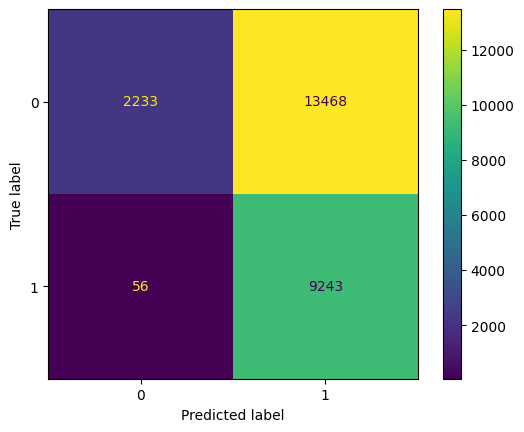

In [36]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [37]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X63      0.319690
X85      0.479742
X106     0.502142
X92      0.503958
X99      0.512200
           ...   
X1       0.979972
X16      0.980124
X66      0.980124
X31      0.980124
label    1.000000
Name: label, Length: 88, dtype: float64

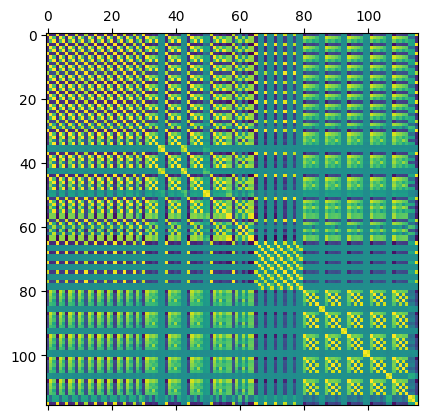

In [38]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(74999, 116)

In [40]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [41]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(74999, 1, 116)

In [42]:
x_train.shape[2]

116

In [43]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(25000, 1, 116)

In [44]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,451
Trainable params: 33,451
Non-trainable params: 0
_________________________________________________________________


In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 3s 51ms/step - loss: 0.5271 - accuracy: 0.8273 - val_loss: 0.3112 - val_accuracy: 0.9911
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2328 - accuracy: 0.9921 - val_loss: 0.1700 - val_accuracy: 0.9931
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1408 - accuracy: 0.9929 - val_loss: 0.1147 - val_accuracy: 0.9934
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0996 - accuracy: 0.9930 - val_loss: 0.0854 - val_accuracy: 0.9934
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0765 - accuracy: 0.9930 - val_loss: 0.0681 - val_accuracy: 0.9935
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0624 - accuracy: 0.9932 - val_loss: 0.0572 - val_accuracy: 0.9935
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0531 - accuracy: 0.9933 - val_loss: 0.0498 - val_accuracy: 0.9935
Epoch 8/100


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

782/782 [==============================] - 2s 2ms/step - loss: 1.6690 - accuracy: 0.6989
Test results - Loss: 1.6690452098846436 - Accuracy: 69.89200115203857%


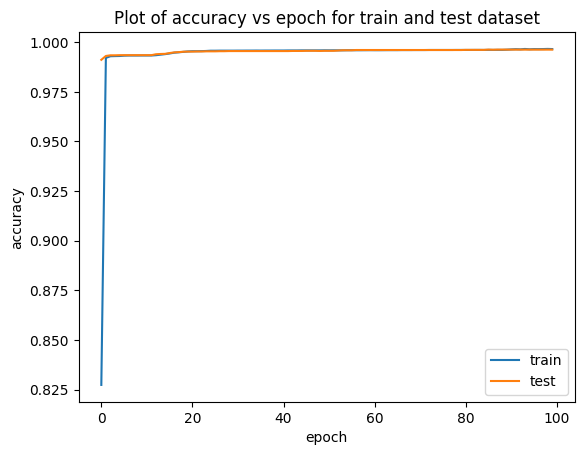

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

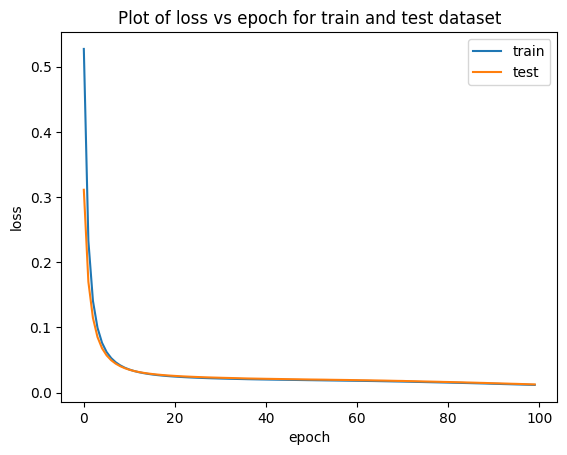

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [55]:
y_test = np.array(y_test)
y_test.shape

(25000,)

In [56]:
type(y_test)

numpy.ndarray

In [57]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

782/782 [==============================] - 2s 2ms/step


In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.19174104742445425
F1 Score -  0.3214639862976652
Precision Score -  0.9938684503901896


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     15701
           1       0.99      0.19      0.32      9299

    accuracy                           0.70     25000
   macro avg       0.83      0.60      0.56     25000
weighted avg       0.79      0.70      0.63     25000



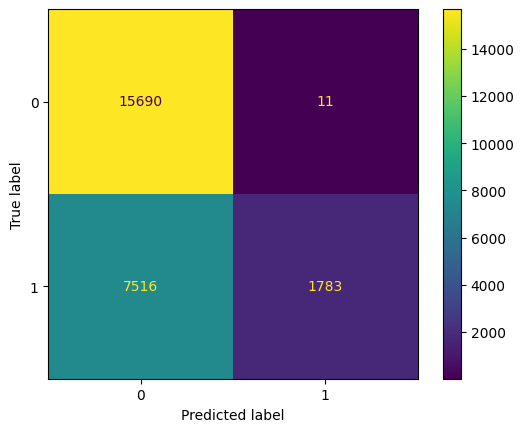

In [59]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [60]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 115)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5800      
                                                                 
 dense_4 (Dense)             (None, 115)               5865      
                                                                 
Total params: 11,665
Trainable params: 11,665
Non-trainable params: 0
_________________________________________________________________


In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
150/150 [==============================] - 2s 5ms/step - loss: 0.9801 - accuracy: 0.0140 - val_loss: inf - val_accuracy: 0.0185
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.9737 - accuracy: 0.0721 - val_loss: inf - val_accuracy: 0.0185
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.9729 - accuracy: 0.1309 - val_loss: inf - val_accuracy: 0.0185
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.9725 - accuracy: 0.1416 - val_loss: inf - val_accuracy: 0.0185
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.9724 - accuracy: 0.1441 - val_loss: inf - val_accuracy: 0.0185
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.9724 - accuracy: 0.1467 - val_loss: inf - val_accuracy: 0.0185
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.9723 - accuracy: 0.1477 - val_loss: inf - val_accuracy: 0.0185
Epoch 8/100
150/150 

In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary_unsw_nb15.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary_unsw_nb15.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

782/782 [==============================] - 2s 3ms/step - loss: inf - accuracy: 0.0185
Test results - Loss: inf - Accuracy: 0.018519999459385872%


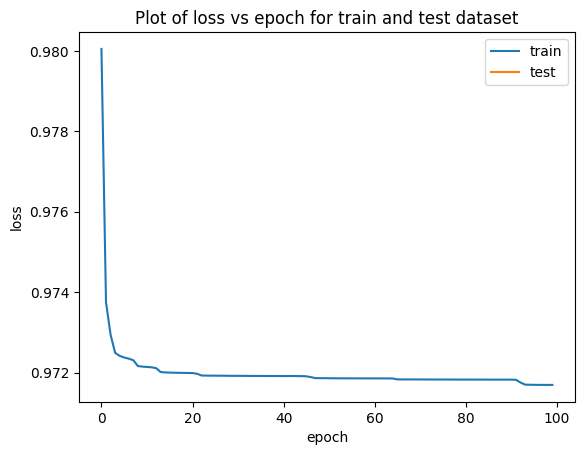

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

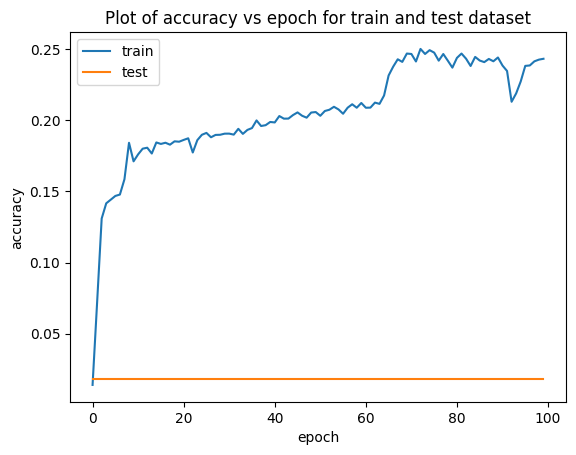

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

782/782 [==============================] - 1s 1ms/step


In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(25000, 115)


## **AE Classifier**

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 115)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5800      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
40/40 [==============================] - 1s 6ms/step - loss: 0.7685 - accuracy: 0.4412 - val_loss: 0.6607 - val_accuracy: 0.9382
Epoch 2/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.6374 - val_loss: 0.6084 - val_accuracy: 0.6224
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.6295 - val_loss: 0.5783 - val_accuracy: 0.6224
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.6295 - val_loss: 0.5465 - val_accuracy: 0.6224
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.6295 - val_loss: 0.5124 - val_accuracy: 0.6224
Epoch 6/300
40/40 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.8677 - val_loss: 0.4756 - val_accuracy: 0.9622
Epoch 7/300
40/40 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.9649 - val_loss: 0.4360 - val_accuracy: 0.9622
Epoch 8/300
4

In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary_unsw_nb15.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary_unsw_nb15.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

782/782 [==============================] - 2s 2ms/step - loss: 1.1484 - accuracy: 0.3720
Test results - Loss: 1.1483732461929321 - Accuracy: 37.196001410484314%


In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

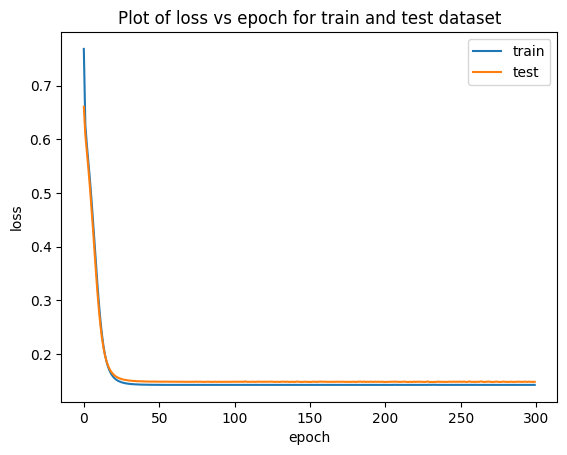

In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

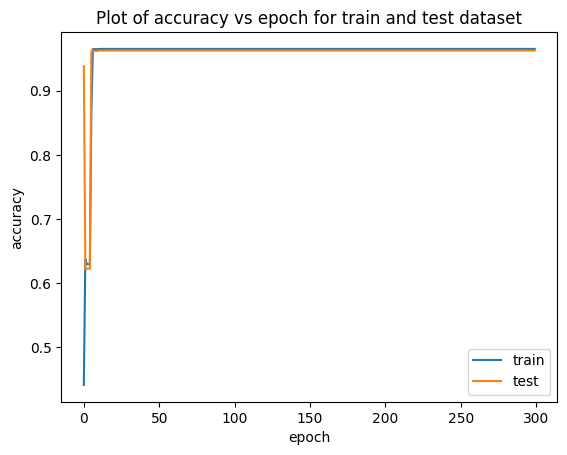

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

782/782 [==============================] - 1s 1ms/step


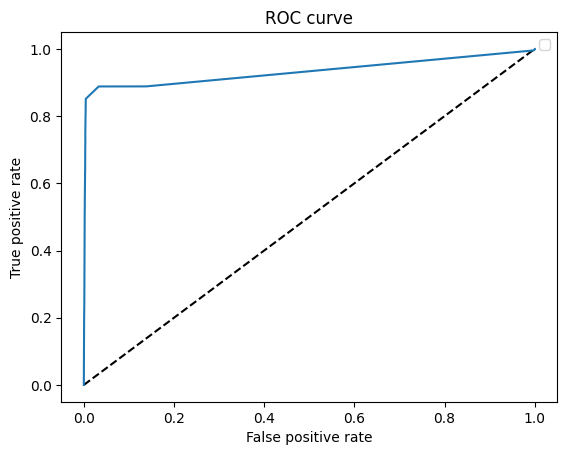

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

782/782 [==============================] - 2s 2ms/step


In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  1.0
F1 Score -  0.5422315519402898
Precision Score -  0.37196


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15701
           1       0.37      1.00      0.54      9299

    accuracy                           0.37     25000
   macro avg       0.19      0.50      0.27     25000
weighted avg       0.14      0.37      0.20     25000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


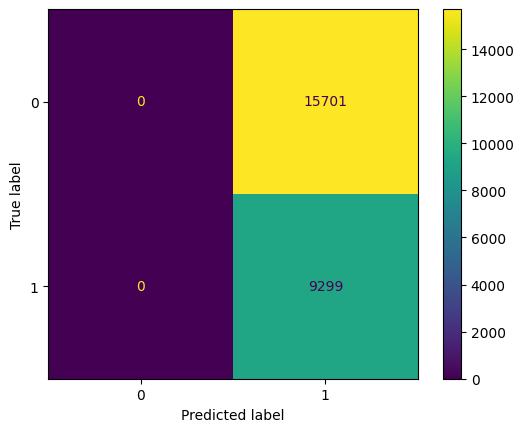

In [89]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()